# Skin Cancer Classification kNN Analysis

Importing required libraries and splitting features and labels as well as training and test data. In the dataset it used its own split ratio, as 16800 training instance and 4192 test instance. Hence, the split ratio is 0.8 for training data and 0.2 test data. From that we will split the training data into 0.7 train, 0.1 validation.

In [ ]:
import pandas as pd
import numpy as np

def load_dataset():

  splits = {'train': 'balanced_skin_cancer_dataset_train_2.parquet', 'test': 'balanced_skin_cancer_dataset_test.parquet'}
  # Load train dataset
  train_df = pd.read_parquet("hf://datasets/akinsanyaayomide/skin_cancer_dataset_balanced_labels/" + splits["train"])
  train_arr = train_df.values
  train_x = train_arr[:, :-1]
  train_y = train_arr[:, -1]

  # Load test dataset
  test_df = pd.read_parquet("hf://datasets/akinsanyaayomide/skin_cancer_dataset_balanced_labels/" + splits["test"])
  test_arr = test_df.values
  test_x = test_arr[:, :-1]
  test_y = test_arr[:, -1]

  return train_x, train_y, test_x, test_y

Test for loading the dataset.

In [ ]:
train_x, train_y, test_x, test_y = load_dataset()

print('Training dataset X shape:', train_x.shape)
print('Training dataset Y shape:', train_y.shape)
print('Test dataset X shape:', test_x.shape)
print('Test dataset Y shape:', test_y.shape)
print('An instance in the training dataset:', train_x[0], train_y[0])
print('An instance in the test dataset:', test_x[0], test_y[0])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Training dataset X shape: (16800, 1)
Training dataset Y shape: (16800,)
Test dataset X shape: (4192, 1)
Test dataset Y shape: (4192,)
An instance in the training dataset: [{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xe0\x00\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x8

Apply transformations to artificially expand the dataset. For this case, we applied rotation.

In [ ]:
import cv2


# Apply rotation to the training image dataset to artificially increase the size of the dataset
# Images are hold as byte arrays in the dataset
def rotate_images(images, angle=90):
    """
    Rotate images by the given angle.
    Args:
    images: numpy array of images(bytes, path)
    angle: angle to rotate the images by
    Returns:
    numpy array of rotated images
    """
    rotated_images = []
    for image in images:
        image_bytes = image[0]["bytes"]
        image_path = image[0]["path"]

        # Rotate the byte array image
        nparr = np.frombuffer(image_bytes, np.uint8)
        img_np = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
        img_np = cv2.rotate(img_np, cv2.ROTATE_90_CLOCKWISE * (angle // 90))
        _, img_encoded = cv2.imencode(".jpg", img_np)
        rotated_images.append([{"bytes": img_encoded.tobytes(), "path": image_path}])

    return np.array(rotated_images)


print(
    "Applying rotation to the training dataset to artificially increase the size of the dataset..."
)

# Double the size of the training dataset by rotating the images by 90(first 1/3), 180(second 1/3), and 270(third 1/3) degrees.
# Split the training dataset into 3 equal parts
train_x_1, train_x_2, train_x_3 = np.array_split(train_x, 3)
train_y_1, train_y_2, train_y_3 = np.array_split(train_y, 3)
train_x_1_rotated = rotate_images(train_x_1, angle=90)
train_x_2_rotated = rotate_images(train_x_2, angle=180)
train_x_3_rotated = rotate_images(train_x_3, angle=270)

print(train_x_1_rotated)
print("Training dataset Y shape after rotation:", train_y_1.shape)

# Concatenate the rotated images with the original training dataset
train_x = np.concatenate(
    (train_x, train_x_1_rotated, train_x_2_rotated, train_x_3_rotated)
)
train_y = np.concatenate((train_y, train_y_1, train_y_2, train_y_3))

print("Training dataset X shape after rotation:", train_x.shape)
print("Training dataset Y shape after rotation:", train_y.shape)
print("Test dataset X shape:", test_x.shape)
print("Test dataset Y shape:", test_y.shape)

Applying rotation to the training dataset to artificially increase the size of the dataset...
[[{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x00\xe0\x00\xe0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\

In [ ]:
def train_val_split(train_x, train_y, val_size=0.125, random_state=464):
    """
    Manually splits the training data into a training and validation set.

    Parameters:
    -----------
    train_x : np.ndarray
        Feature matrix of the training data.

    train_y : np.ndarray
        Labels for the training data.

    val_size : float
        Proportion of the training data to be used as validation set.

    random_state : int
        Random seed for reproducibility.

    Returns:
    --------
    X_train, X_val, y_train, y_val : np.ndarray
        Training and validation splits of the features and labels.
    """
    np.random.seed(random_state)

    indices = np.arange(train_x.shape[0])
    np.random.shuffle(indices)

    split_index = int((1 - val_size) * len(indices))

    X_train, X_val = train_x[indices[:split_index]], train_x[indices[split_index:]]
    y_train, y_val = train_y[indices[:split_index]], train_y[indices[split_index:]]

    return X_train, X_val, y_train, y_val

In [ ]:
from PIL import Image
import io
from sklearn.decomposition import PCA

def bytes_to_image_array(byte_data):
    """
    Decodes byte data to a flattened grayscale pixel array of target size.
    """
    image = Image.open(io.BytesIO(byte_data))
    return np.array(image).flatten() / 255.0  # Normalize to [0, 1]

def calc_distance_matrix(train_bytes, test_bytes, n_components=100):
    """
    Calculates the Euclidean distance matrix between test and training samples.
    Applies PCA for dimensionality reduction.
    """
    # Convert byte data to flattened image arrays
    X_train = np.array([bytes_to_image_array(b[0]["bytes"]) for b in train_bytes])
    X_test = np.array([bytes_to_image_array(b[0]["bytes"]) for b in test_bytes])

    # Apply PCA to reduce dimensions
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Calculate the Euclidean distance matrix in the reduced PCA space
    distances = np.sqrt(((X_test_pca[:, np.newaxis, :] - X_train_pca[np.newaxis, :, :]) ** 2).sum(axis=2))
    return distances

In [ ]:
def get_neighbors(train_X, train_Y, test_instance, k, distance_matrix=None, test_index=0):
    """
    Finds the k nearest neighbors of a given test instance using the distance matrix.
    """
    if distance_matrix is not None:
        # Use the precomputed distance matrix if available
        distances = distance_matrix[test_index]
    else:
        # Compute distances directly if not using a matrix
        distances = np.linalg.norm(train_X - test_instance, axis=1)

    # Get sorted indices and retrieve the k closest classes
    sorted_indexes = np.argsort(distances)
    sorted_classes = train_Y[sorted_indexes]
    return sorted_classes[:k]

In [ ]:
def classify(neighbors_classes):
    """
    Determines the most occuring label among the neighboring data points.

    Parameters:
    -----------
    neighbors_classes : list
        A list of class labels for the nearest neighbors of a given test point.

    Returns:
    --------
    most_voted_class : object
        The class label with the highest number of votes among the neighbors.
        If there is a tie, the first encountered class with the highest count is returned.
    """
    class_votes = {cls: 0 for cls in neighbors_classes}
    for cls in neighbors_classes:
        class_votes[cls] += 1
    most_vote_count = 0
    most_voted_class = None
    for cls in class_votes:
        if class_votes[cls] > most_vote_count:
            most_voted_class = cls
            most_vote_count = class_votes[cls]
    return most_voted_class

In [ ]:
class KNN:
    """
    K-Nearest Neighbors (KNN) classifier with distance matrix.
    """
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors

    def fit(self, train_x, train_y):
        self.train_X = train_x
        self.train_y = train_y

    def predict(self, test_x):
        # Compute distance matrix between all test and training samples
        distance_matrix = calc_distance_matrix(self.train_X, test_x)

        predictions = []
        for test_index, _ in enumerate(test_x):
            neighbors_classes = get_neighbors(self.train_X, self.train_y, test_x[test_index],
                                              self.n_neighbors, distance_matrix, test_index)
            predicted_label = classify(neighbors_classes)
            predictions.append(predicted_label)

        return predictions

Testing kNN for the image data. We first load the dataset and set training data and test data as well as features and labels. Then we split the training data 0.7 train and 0.1 validation approximately. Then from k = 1, 3, ..., 9 we choose the best three k values as our metric for the performances that will be used on the test data.

In [ ]:
train_x, train_y, test_x, test_y = load_dataset()
X_train, X_val, y_train, y_val = train_val_split(train_x, train_y)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Validation Accuracy for K=1: 49.048%
Validation Accuracy for K=3: 48.095%
Validation Accuracy for K=5: 47.810%
Validation Accuracy for K=7: 47.143%
Validation Accuracy for K=9: 45.905%

K values above the threshold of 0.47: [1, 3, 5, 7]

K=1 | Test Accuracy: 49.738%
Confusion Matrix for K = 1:
 [[193  79  51  54  23  30  66  28]
 [ 40 278  76  17  36  38  21  18]
 [ 28 102 229  21  50  65  16  13]
 [ 31  25  17 366  11  20  24  30]
 [ 30  49 103  25 161 117  18  21]
 [ 13  46  78  25  62 261  11  28]
 [ 74  51  47  62  17  29 205  39]
 [ 18  17  18  34  12  18  15 392]]
Classification Report for K = 1:
               precision    recall  f1-score   support

           0       0.45      0.37      0.41       524
           1       0.43      0.53      0.47       524
           2       0.37      0.44      0.40       524
           3       0.61      0.70      0.65       524
           4       0.43      0.31      0.36       524
           5       0.45      0.50      0.47       524
          

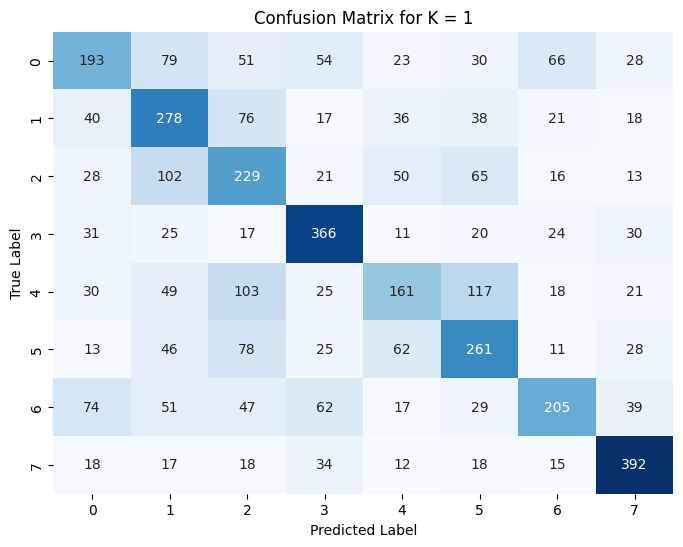


K=3 | Test Accuracy: 49.356%
Confusion Matrix for K = 3:
 [[196  97  53  48  17  28  56  29]
 [ 31 305  81  20  25  29  22  11]
 [ 28 112 223  24  42  66  16  13]
 [ 34  28  20 351   9  23  27  32]
 [ 22  56 113  24 150 122  17  20]
 [ 10  47  81  19  55 276  11  25]
 [ 81  64  47  66  12  32 180  42]
 [ 14  18  16  32  11  31  14 388]]
Classification Report for K = 3:
               precision    recall  f1-score   support

           0       0.47      0.37      0.42       524
           1       0.42      0.58      0.49       524
           2       0.35      0.43      0.39       524
           3       0.60      0.67      0.63       524
           4       0.47      0.29      0.36       524
           5       0.45      0.53      0.49       524
           6       0.52      0.34      0.42       524
           7       0.69      0.74      0.72       524

    accuracy                           0.49      4192
   macro avg       0.50      0.49      0.49      4192
weighted avg       0.50      0

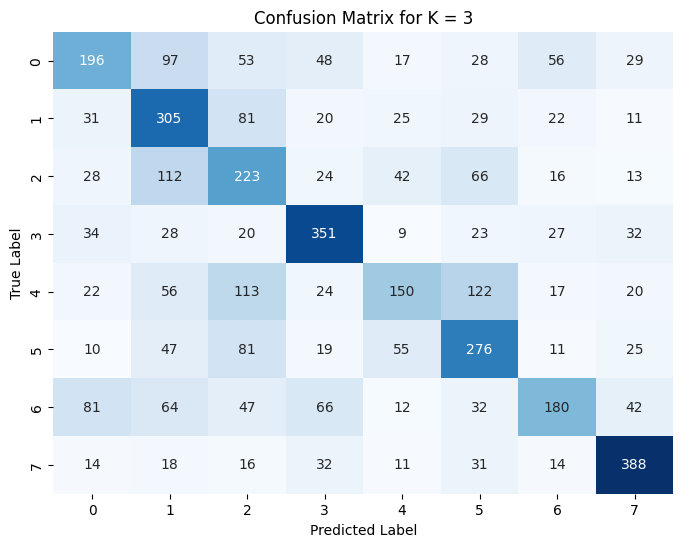


K=5 | Test Accuracy: 48.593%
Confusion Matrix for K = 5:
 [[181 112  62  54  13  27  50  25]
 [ 29 321  88   6  26  33  14   7]
 [ 20 138 219  21  37  70  10   9]
 [ 35  34  21 352   6  21  31  24]
 [ 13  68 123  21 136 127  11  25]
 [  8  49  82  17  48 285  11  24]
 [ 77  75  55  71  12  34 157  43]
 [ 21  18  12  34  12  27  14 386]]
Classification Report for K = 5:
               precision    recall  f1-score   support

           0       0.47      0.35      0.40       524
           1       0.39      0.61      0.48       524
           2       0.33      0.42      0.37       524
           3       0.61      0.67      0.64       524
           4       0.47      0.26      0.33       524
           5       0.46      0.54      0.50       524
           6       0.53      0.30      0.38       524
           7       0.71      0.74      0.72       524

    accuracy                           0.49      4192
   macro avg       0.50      0.49      0.48      4192
weighted avg       0.50      0

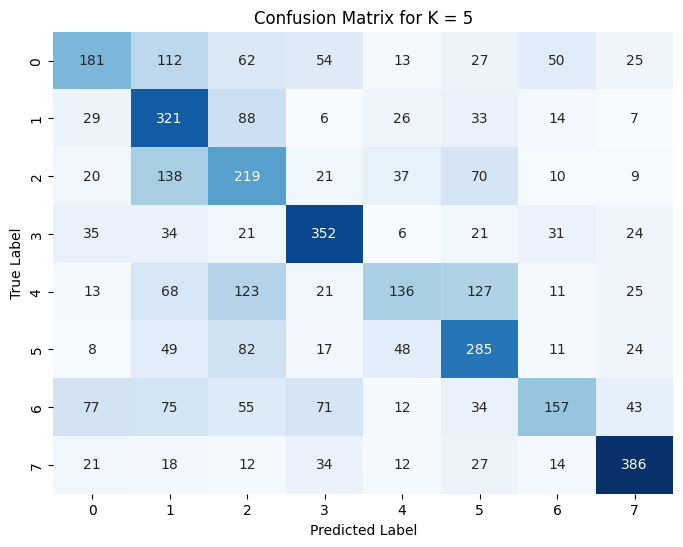


K=7 | Test Accuracy: 47.758%
Confusion Matrix for K = 7:
 [[170 125  63  52  16  29  44  25]
 [ 20 345  89   8  21  26   9   6]
 [ 16 147 221  15  37  69   9  10]
 [ 40  38  23 346   7  22  20  28]
 [ 14  69 135  17 118 139   5  27]
 [  6  55  84  17  43 286   6  27]
 [ 83  88  62  70  11  27 143  40]
 [ 16  24  21  29  11  36  14 373]]
Classification Report for K = 7:
               precision    recall  f1-score   support

           0       0.47      0.32      0.38       524
           1       0.39      0.66      0.49       524
           2       0.32      0.42      0.36       524
           3       0.62      0.66      0.64       524
           4       0.45      0.23      0.30       524
           5       0.45      0.55      0.49       524
           6       0.57      0.27      0.37       524
           7       0.70      0.71      0.70       524

    accuracy                           0.48      4192
   macro avg       0.50      0.48      0.47      4192
weighted avg       0.50      0

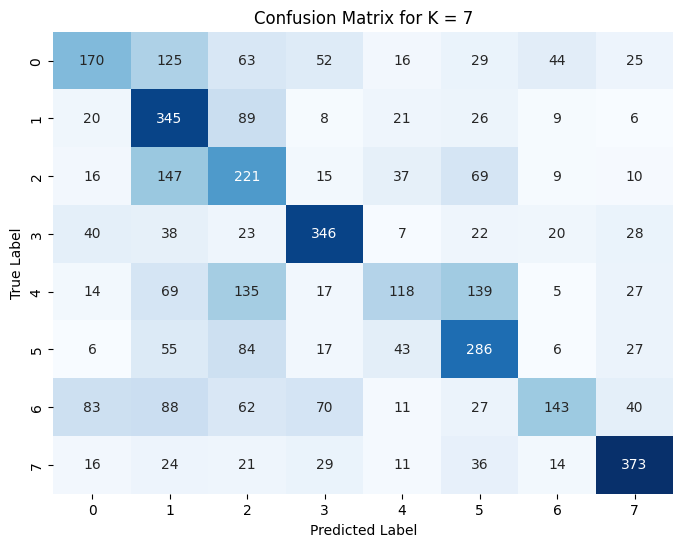

In [ ]:
k_values = range(1, 10, 2)
validation_scores = {}

test_y = test_y.astype(int)
y_val = y_val.astype(int)

THRESHOLD = 0.47

for k in k_values:
    knn = KNN(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_pred_y = knn.predict(X_val)

    val_accuracy = accuracy_score(y_val, val_pred_y)
    validation_scores[k] = val_accuracy
    print(f"Validation Accuracy for K={k}: {val_accuracy * 100:.3f}%")

top_k = [k for k, score in validation_scores.items() if score > THRESHOLD]
print("\nK values above the threshold of {:.2f}:".format(THRESHOLD), top_k)

for k in top_k:
    knn = KNN(n_neighbors=k)
    knn.fit(train_x, train_y)
    pred_y = knn.predict(test_x)

    test_accuracy = accuracy_score(test_y, pred_y)
    print("\nK={} | Test Accuracy: {:.3f}%".format(k, test_accuracy * 100))

    conf_matrix = confusion_matrix(test_y, pred_y)
    print("Confusion Matrix for K = {}:\n".format(k), conf_matrix)

    print("Classification Report for K = {}:\n".format(k), classification_report(test_y, pred_y))

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix for K = {}".format(k))
    plt.show()